# Lecture 02

## Model 1 - scikit-learn circles 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from torch import nn 



In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

#### Creating and visualizing the dataset

(1000, 2) (1000,)


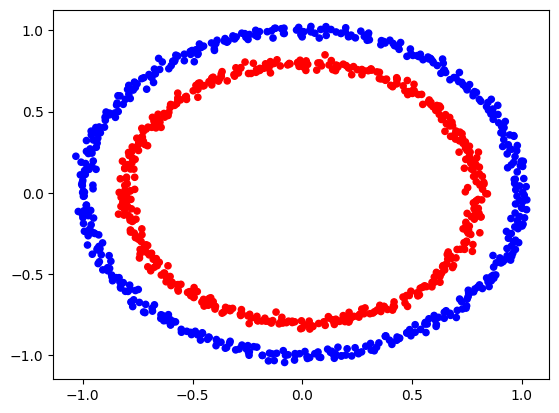

In [166]:
X, Y = make_circles(n_samples=1000, noise=0.02, random_state=42)


plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr", s=20)
plt.show

print(X.shape, Y.shape)

#### Creating the model class

In [12]:
class ModelForCircles(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self,x):
        return self.layer3(self.relu2(self.layer2(self.relu1(self.layer1(x)))))

In [22]:
model = ModelForCircles().to(device)
lossFn = torch.nn.BCEWithLogitsLoss()
optimFn = torch.optim.SGD(model.parameters(), lr=0.05)

#### Splitting the data

In [169]:
X_train, X_test, Y_train, Y_test = [ torch.from_numpy(arr).float().to(device) for arr in train_test_split(X,Y, test_size=0.2) ] 

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


#### Training the model 

In [173]:
epochs = 10000 

for epoch in range(epochs): 
    model.train()
    preds = model(X_train).squeeze()
    
    optimFn.zero_grad()
    
    loss = lossFn(preds, Y_train)

    loss.backward()

    optimFn.step() 

    if epoch % 1000 == 0: 
      
        with torch.inference_mode(): 
            model.eval()
            predsTest = model(X_test).squeeze()
            lossTest = lossFn(predsTest, Y_test)
            print("Current epoch: ", epoch)
            print("Loss on a training set: ", loss.item())
            print("Loss on a test set: ", lossTest.item())
    

Current epoch:  0
Loss on a training set:  0.002231578342616558
Loss on a test set:  0.0023558568209409714
Current epoch:  1000
Loss on a training set:  0.0019354873802512884
Loss on a test set:  0.0020462728571146727
Current epoch:  2000
Loss on a training set:  0.0017048307927325368
Loss on a test set:  0.0018050544895231724
Current epoch:  3000
Loss on a training set:  0.001513201161287725
Loss on a test set:  0.0015775924548506737
Current epoch:  4000
Loss on a training set:  0.0013589480658993125
Loss on a test set:  0.0014028555015102029
Current epoch:  5000
Loss on a training set:  0.0012328381417319179
Loss on a test set:  0.0012689968571066856
Current epoch:  6000
Loss on a training set:  0.0011270258110016584
Loss on a test set:  0.0011591844959184527
Current epoch:  7000
Loss on a training set:  0.0010368777438998222
Loss on a test set:  0.001066218945197761
Current epoch:  8000
Loss on a training set:  0.0009592098067514598
Loss on a test set:  0.000986400991678238
Current 

#### Code from GitHub to visualize

In [20]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    model.to(device)
    X, y = X.to(device), y.to(device)

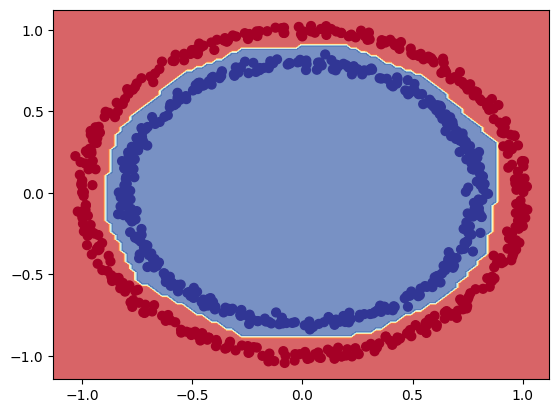

In [174]:
plot_decision_boundary(model, X_train, Y_train)

## Model 2 - scikit-learn circles 

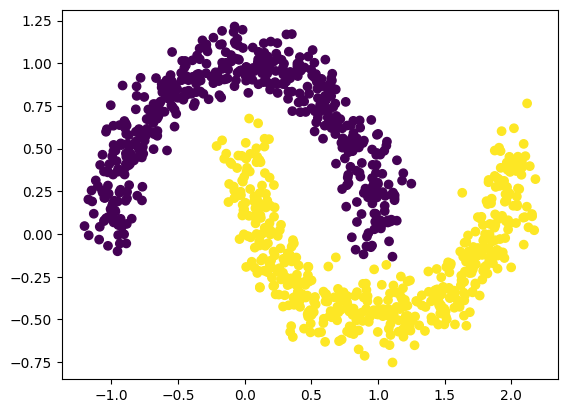

In [36]:
X,Y = make_moons(1000, noise = 0.1)

plt.scatter(X[:,0], X[:,1], c = Y)

X_train, X_test, Y_train, Y_test = [torch.from_numpy(arr).float().to(device) for arr in train_test_split(X,Y, test_size=0.2)]


In [30]:
model_moons = ModelForCircles().to(device)
optimFnM = torch.optim.SGD(model_moons.parameters(), lr=0.05)

In [49]:
epochs = 10000

for epoch in range(epochs):
    model_moons.train()
    preds = model_moons(X_train).squeeze()
    optimFnM.zero_grad()

    loss = lossFn(preds, Y_train)

    loss.backward() 

    optimFnM.step()


    if epoch % 1000 == 0: 
        model_moons.eval()
        preds_test = model_moons(X_test).squeeze()
        loss_test = lossFn(preds_test, Y_test)

        print("Test loss: ", loss_test.item())
        print("Train loss:", loss.item())
        print("------------")

        
    

Test loss:  0.008617620915174484
Train loss: 0.0016198372468352318
------------
Test loss:  0.008410912938416004
Train loss: 0.001514839823357761
------------
Test loss:  0.008224619552493095
Train loss: 0.0014231621753424406
------------
Test loss:  0.008061095140874386
Train loss: 0.0013424184871837497
------------
Test loss:  0.007911715656518936
Train loss: 0.0012704160762950778
------------
Test loss:  0.007771577686071396
Train loss: 0.001206175540573895
------------
Test loss:  0.0076439701952040195
Train loss: 0.0011481723049655557
------------
Test loss:  0.0075224339962005615
Train loss: 0.0010957480408251286
------------
Test loss:  0.0074159842915833
Train loss: 0.0010478803887963295
------------
Test loss:  0.007310513406991959
Train loss: 0.0010042261565104127
------------


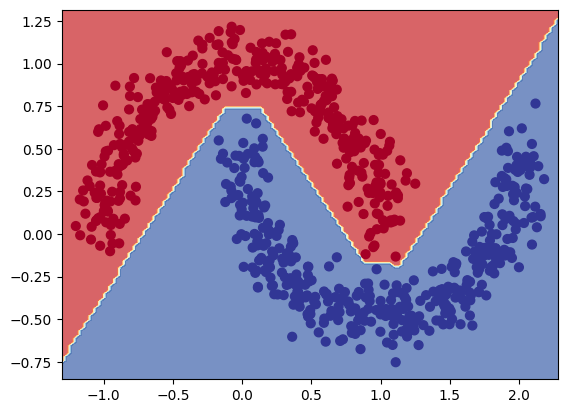

In [51]:
plot_decision_boundary(model_moons, X_train, Y_train)

## Model 3 - multiclass classification

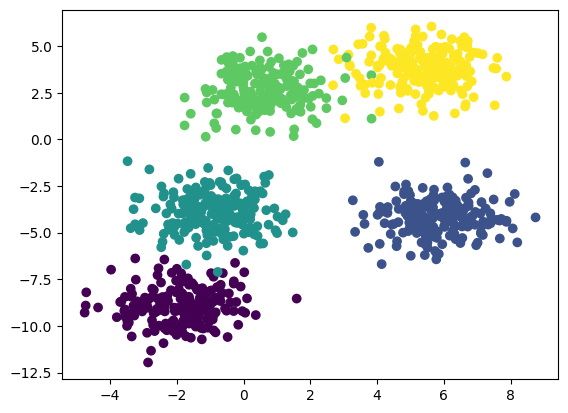

In [11]:
X,Y = make_blobs(1000, centers=5, random_state=40)

plt.scatter(X[:,0], X[:,1], c=Y)

In [15]:
X_train, X_test, Y_train, Y_test = [ torch.from_numpy(arr).float().to(device) for arr in train_test_split(X,Y, test_size=0.2) ]

In [35]:
class MultiClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,10)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(10,10)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(10,5)

    def forward(self, x):
        return self.layer3(self.relu2(self.layer2(self.relu1(self.layer1(x)))))
        

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [36]:
multiClassModel = MultiClassModel().to(device)

lossFn = torch.nn.CrossEntropyLoss()
optimFn = torch.optim.Adam(multiClassModel.parameters())


In [37]:
epochs = 10000

for epoch in range(epochs):
    
    multiClassModel.train()

    preds = multiClassModel(X_train).squeeze()

    optimFn.zero_grad()

    loss = lossFn(preds, Y_train)

    loss.backward()

    optimFn.step()


    if epoch % 1000 == 0: 
        with torch.inference_mode():
            multiClassModel.eval()
            
            predsTest = multiClassModel(X_test).squeeze()

            lossTest = lossFn(predsTest, Y_test)

            print("Train set loss: ", loss.item())
            print("Test set loss: ", lossTest.item())

            

Train set loss:  1.6059521436691284
Test set loss:  1.5580695867538452
Train set loss:  0.036565717309713364
Test set loss:  0.05541905388236046
Train set loss:  0.017059486359357834
Test set loss:  0.05412923917174339
Train set loss:  0.01522006280720234
Test set loss:  0.05994746834039688
Train set loss:  0.014288710430264473
Test set loss:  0.06627662479877472
Train set loss:  0.013406229205429554
Test set loss:  0.07045581936836243
Train set loss:  0.012652866542339325
Test set loss:  0.07643986493349075
Train set loss:  0.01206984557211399
Test set loss:  0.08682485669851303
Train set loss:  0.011563500389456749
Test set loss:  0.10657694935798645
Train set loss:  0.011126432567834854
Test set loss:  0.14079329371452332


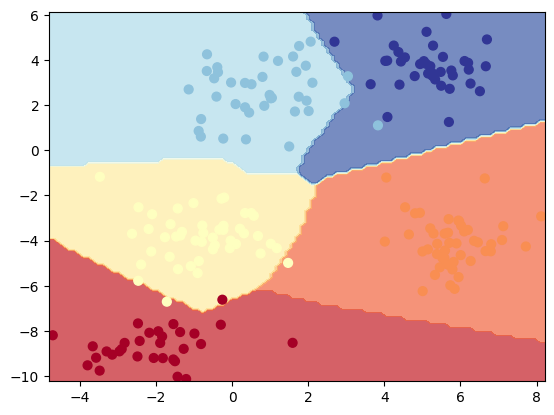

In [39]:
plot_decision_boundary(multiClassModel, X_test, Y_test)